In [ ]:
%matplotlib inline


# Building histograms using Rectangles and PolyCollections


Using a path patch to draw rectangles.
The technique of using lots of Rectangle instances, or
the faster method of using PolyCollections, were implemented before we
had proper paths with moveto/lineto, closepoly etc in mpl.  Now that
we have them, we can draw collections of regularly shaped objects with
homogeneous properties more efficiently with a PathCollection.  This
example makes a histogram -- its more work to set up the vertex arrays
at the outset, but it should be much faster for large numbers of
objects



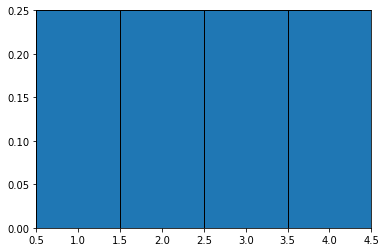

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path

fig, ax = plt.subplots()

# Fixing random state for reproducibility
np.random.seed(19680801)


# histogram our data with numpy

data =[1,2,3,4]
n, bins = np.histogram(data, [1,2,3,4,5],density=True)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])-0.5
right = np.array(bins[1:])-0.5
bottom = np.zeros(len(left))
top = bottom + n


# we need a (numrects x numsides x 2) numpy array for the path helper
# function to build a compound path
XY = np.array([[left, left, right, right], [bottom, top, top, bottom]]).T

# get the Path object
barpath = path.Path.make_compound_path_from_polys(XY)

# make a patch out of it
patch = patches.PathPatch(barpath)
ax.add_patch(patch)

# update the view limits
ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

plt.show()